## Описание проекта

**Перед нами данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам предстоит выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

## Подготовка данных

**Для дальнейшей работы импортируем нужные нам библиотеки.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

**Прочитаем файл и взглянем на данные.**

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Всего у нас 16715 строк и 11 столбов со следующими названиями:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта - ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Названия и типы столбцов

**Выведем общую информацию о датафрейме.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Взглянув на названия столбцов можно заметить, что их стоит привести к нижнему регистру.**

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Теперь заменим тип данных в столбце `user_score` на `float64`, но перед этим взглянем на содержимое.**

In [6]:
#data['user_score'] = pd.to_numeric(data['user_score'], errors='raise')
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1         2
9.6       2
0.2       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

**tbd - это означает "to be determined"("будет определено позднее"). Это указывает на то, что для некоторых игр оценка пользователей еще не была установлена на момент сбора данных. Заменим их на NaN при замене типа.**

In [7]:
data['user_score'] = pd.to_numeric(
    data['user_score'], errors='coerce')#coerse - принудительная замена на NaN
data['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
0.9      2
1.9      2
1.3      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

**Готово, мы привели названия столбцов к нижнему регистру и поменяли тип данных в столбце `user_score`, параллельно заменив значения `tbd` на NaN.**

### Пропуски и дубликаты

**Ещё раз взглянем на всю информацию о датафрейме и начнём заполнять пропуски.**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


**Два пропуска в столбце `name`, посмотрим на них.**

In [9]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Удалим их, данные явно не получится заполнить корректно.**

In [10]:
data = data.dropna(subset=['name'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

**Остальные пропуски мы заполним следующим образом:**

- year_of_release - медианным значением по `platform`;
- critic_score и user_score - медианным значением по `genre`;
- rating - модой по `genre`.

In [11]:
pd.options.mode.chained_assignment = None #Выключаем предупреждения

for i in data['platform'].unique(): #замена в year_of_release
    data.loc[(data['platform'] == i) & (data['year_of_release'].isna()), 'year_of_release'] =\
    data.loc[(data['platform'] == i), 'year_of_release'].median()

In [12]:
for i in data['genre'].unique(): #замена в critic_score
    data.loc[(data['genre'] == i) & (data['critic_score'].isna()), 'critic_score'] =\
    data.loc[(data['genre'] == i), 'critic_score'].median()

In [13]:
for i in data['genre'].unique(): #замена в user_score
    data.loc[(data['genre'] == i) & (data['user_score'].isna()), 'user_score'] =\
    data.loc[(data['genre'] == i), 'user_score'].median()

In [14]:
for i in data['genre'].unique(): #замена в user_score по genre
    ra = data.loc[data['genre'] == i, 'rating'].mode()
    data.loc[(data['genre'] == i) & (data['rating'].isna()), 'rating'] = ra.iloc[0]

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

А тут не совсем оптимальный метод. В целом, оценки критиков и пользователей достаточно индивидуальный и субъективны и лучше всего их оставить как есть или заменить заглушкой. 

**Взглянем на готовый данные.**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


**Пропуски могли быть пропущены по большому количеству причин, например ошибка выгрузки данных, из-за которой часть из них могла потеряться. Так же ошибка программы или человека, которые заполняли данные. Момент с `tbd`("будет определено позднее") мы разобрали, вероятнее всего данные просто забыли заполнить, ведь там были и старые игры, а новые игры ещё не успели.**

**Теперь посмотрим на полные дубликаты и на дубликаты по группам**

In [16]:
data.duplicated().sum()

0

**Полных дубликатов нет, взглянем на дубликаты, объединив в группу с `name` и`year_of_realese`.**

In [17]:
data[data[['name', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,2011.0,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


**Мы удалим дубликаты, в которых указан год, приближенный к 2016, то есть более молодые, добавленные позже.**

In [18]:
data.drop([1190, 4127, 11715, 16230], inplace=True)
data[data[['name', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Готово, дубликатов больше нет.**

### Столбец общей выручки

**Создадим столбец, в котором будут суммарные продажи во всех регионах, назовём его `full_sales`.**

In [19]:
for i in range(len(data)):
    data['full_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.0,7.7,E,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16704,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,68.0,7.4,T,0.01
16705,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,75.0,7.4,E,0.01
16706,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,E,0.01
16707,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,69.0,7.7,E,0.01


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

А еще есть такой метод `df['x'] = df[['a', 'b', 'c']].sum(axis=1)`

**Готово, мы удали дубликаты по группам(их было 4 штуки), заполнили все пропуски в след столбцах:**
- year_of_release
- critic_score
- user_score
- rating

**Так же создали новый столбец с суммой продаж по всем регионам для каждой игры. У нас осталось 16709 строк.**

## Исследовательский анализ

**Взглянем, сколько игр выпускалось в разные года.**

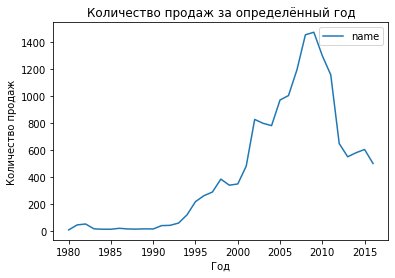

In [20]:
year_gr = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_gr.plot(kind='line')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.title('Количество продаж за определённый год');

**Видим хороший рост, начиная с 2000 года. Думаю, все года до 2000 не так важны, как после него.**

**Далее возьмём топ платформ по продажам и построим по нему график. Так же покажем появление и исчезновение каждой платформы.**

In [21]:
qq = data.groupby('platform')['full_sales'].sum()
qq.sort_values()

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       54.07
WiiU      82.19
2600      96.98
XOne     159.32
GC       198.93
SNES     200.04
N64      218.68
NES      251.05
GB       255.46
XB       257.74
3DS      259.00
PC       259.44
PSP      294.05
PS4      314.14
GBA      317.85
PS       730.86
DS       806.12
Wii      907.51
PS3      939.16
X360     969.86
PS2     1255.77
Name: full_sales, dtype: float64

**Самые популярные платформы - `PS`, `DS`, `Wii`, `PS3`, `X360`, `PS2`. Построим по ним график.**

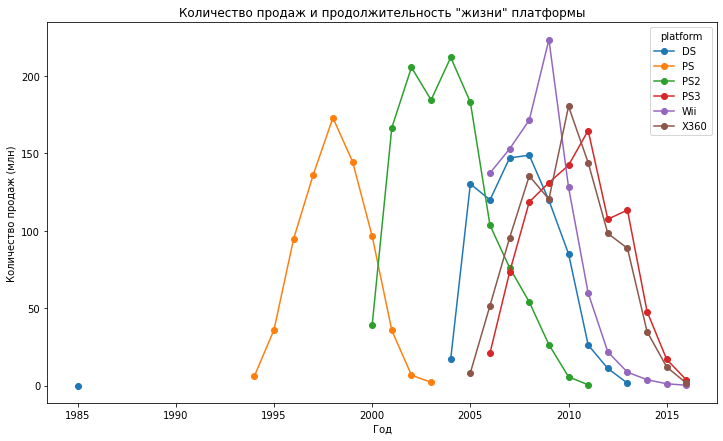

In [22]:
top_platforms = ['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']
filt_data = data[data['platform'].isin(top_platforms)]
filt_data = filt_data.groupby(['year_of_release', 'platform'])['full_sales'].sum().unstack()
filt_data.plot(kind='line', figsize=(12, 7), marker='o')
plt.ylabel('Количество продаж (млн)')
plt.xlabel('Год')
plt.title('Количество продаж и продолжительность "жизни" платформы');

**Подозрительная запись платформы `DS` в 1985 году, вероятнее всего такой платформы раньше не существовало, стоит её удалить и вывести новый график.**

In [23]:
data.query('(year_of_release == 1985) & (platform == "DS")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,68.0,7.4,T,0.02


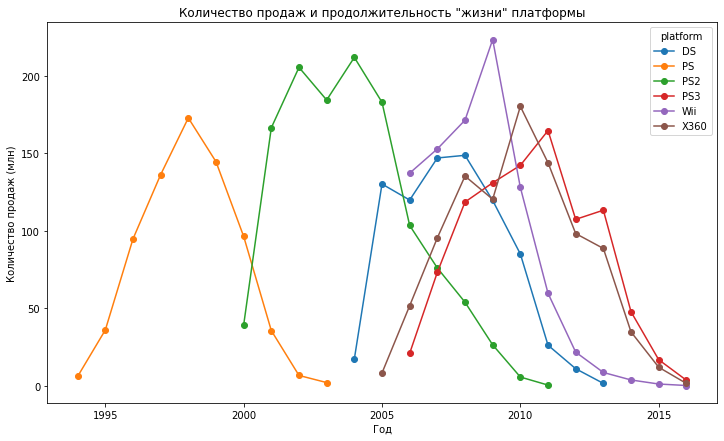

In [24]:
data.drop(15957, inplace=True)
data.reset_index(drop=True)
top_platforms = ['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']
filt_data = data[data['platform'].isin(top_platforms)]
filt_data = filt_data.groupby(['year_of_release', 'platform'])['full_sales'].sum().unstack()
filt_data.plot(kind='line', figsize=(12, 7), marker='o')
plt.ylabel('Количество продаж (млн)')
plt.xlabel('Год')
plt.title('Количество продаж и продолжительность "жизни" платформы');

**Срок жизни топовых платформ:**
- PS с 1993 по 2003; 
- DS - с 2004 по 2013;
- Wii - 2006 по 2016;
- PS3 - с 2006 по 2016;
- X360 - с 2005 по 2016;
- PS2 - с 2000 по 2011.

**Теперь посмотрим когда начали и закончили выпускать игры на определённые платформы, так же выявим среднюю продолжительность всех платформ.**

In [25]:
life_pl = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
life_pl['life'] = life_pl['max'] - life_pl['min'] + 1
display(life_pl)
print('Средняя продолжительность всех платформ равна -', life_pl['life'].mean(), 'годам.')

,min,max,life
platform,,,
2600,1980.0,1989.0,10.0
3DO,1994.0,1995.0,2.0
3DS,2011.0,2016.0,6.0
DC,1998.0,2008.0,11.0
DS,2004.0,2013.0,10.0
GB,1988.0,2001.0,14.0
GBA,2000.0,2007.0,8.0
GC,2001.0,2007.0,7.0
GEN,1990.0,1994.0,5.0


Средняя продолжительность всех платформ равна - 8.0 годам.


**`PC` самая долгоживущая платформа, она актуально и по сей день.**

### Актуальный период

**Актуальный период - это период, с которым мы будем работать далее, для нас это с 2014 по 2016 года, брать более ранние смысла нет, они будут не актуальны. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

In [26]:
new_data = data.query('year_of_release >= 2014').reset_index(drop=True)
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,M,14.63
1,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,74.0,7.8,T,11.68
3,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,73.0,7.4,M,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1685,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,E,0.01
1686,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,69.0,7.1,E,0.01
1687,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,68.0,7.4,T,0.01
1688,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,E,0.01


**Новый даиафрейм имеет 1690 строк.**

### Лидеры продаж

**Выявим топ 5 платформ с наибольшим числом продаж.**

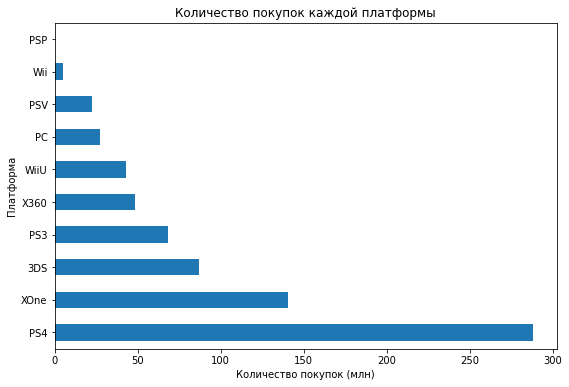

In [27]:
new_data_f = new_data.groupby('platform')['full_sales'].sum()
new_data_f.sort_values(ascending=False, inplace=True)
new_data_f.plot(kind='barh', figsize=(9, 6))
plt.title('Количество покупок каждой платформы')
plt.ylabel('Платформа')
plt.xlabel('Количество покупок (млн)');

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

Тут лучше всего сделать график, которые показывает по годам разницу среди платформ. Аналогичный тому, который ты выводишь выше.

**Заслуженно первые 5 мест занимают: PS4, XOne, 3DS, PS3, X360.**

### Ящик с усами для глобальных продаж

**Построим ящик с усами для глобальных продаж по каждой платформе.**

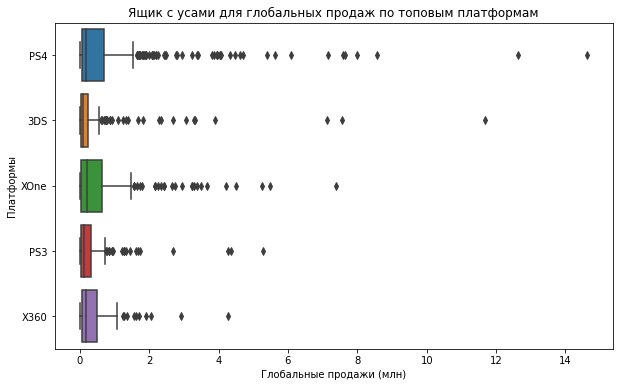

In [28]:
qq = ['PS4', 'XOne', '3DS', 'PS3', 'X360']

new_data_f = new_data[new_data['platform'].isin(qq)]
plt.figure(figsize=(10, 6))
sns.boxplot(y='platform', x='full_sales', data=new_data_f)
plt.title('Ящик с усами для глобальных продаж по топовым платформам')
plt.ylabel('Платформы')
plt.xlabel('Глобальные продажи (млн)');

**Результаты разглядеть тяжело, но и без них можно сделать чётки вывод - большинство значении вышли за пределы ящика, а это значит, что большинство из них находятся далеко от среднего или медианы. У платформ `PS4` и `3DS` есть значения, которые уж очень далеки от ящика, по сравнению с другими. В целом, сами ящики расположены правильно, чем больше продаж, тем больше сам ящик.**

### Корреляция оценок

**Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постром диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Возьмём платформу `PS2`.**

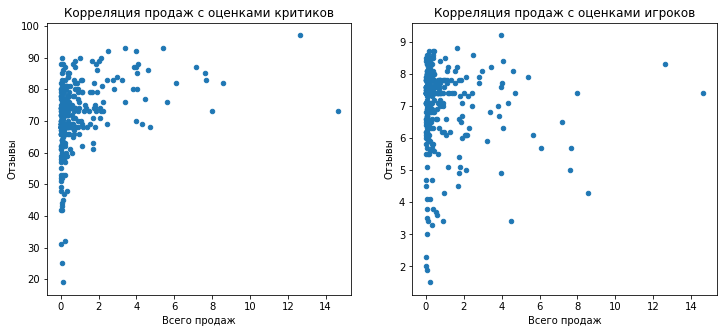

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

new_data_c = new_data.query('platform == "PS4"')
new_data_c.plot(x='full_sales', y='critic_score', kind='scatter', ax=axes[0])
axes[0].set_title('Корреляция продаж с оценками критиков')
axes[0].set_xlabel('Всего продаж')
axes[0].set_ylabel('Отзывы');
new_data_c.plot(x='full_sales', y='user_score', kind='scatter', ax=axes[1])
axes[1].set_title('Корреляция продаж с оценками игроков')
axes[1].set_xlabel('Всего продаж')
axes[1].set_ylabel('Отзывы');

**Корреляция в цифрах для платформы `PS2`.**

In [30]:
new_data_c[['critic_score', 'user_score', 'full_sales']].corr()

,critic_score,user_score,full_sales
critic_score,1.000000,0.475761,0.346089
user_score,0.475761,1.000000,-0.067095
full_sales,0.346089,-0.067095,1.000000


**Дополнительно посмотрим корреляцию для платформы `XOne`.**

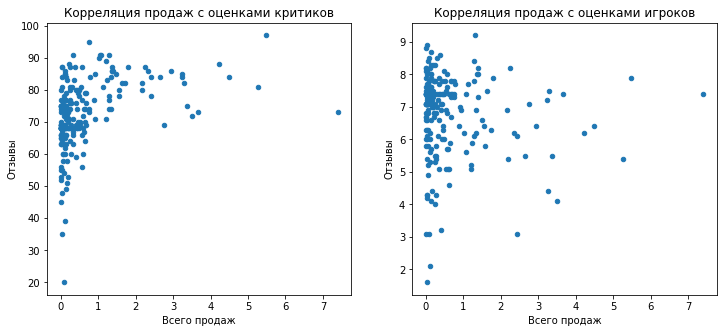

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

new_data_c = new_data.query('platform == "XOne"')
new_data_c.plot(x='full_sales', y='critic_score', kind='scatter', ax=axes[0])
axes[0].set_title('Корреляция продаж с оценками критиков')
axes[0].set_xlabel('Всего продаж')
axes[0].set_ylabel('Отзывы');
new_data_c.plot(x='full_sales', y='user_score', kind='scatter', ax=axes[1])
axes[1].set_title('Корреляция продаж с оценками игроков')
axes[1].set_xlabel('Всего продаж')
axes[1].set_ylabel('Отзывы');

**Корреляция в цифрах для платформы `PS4`.**

In [32]:
new_data_c[['critic_score', 'user_score', 'full_sales']].corr()

,critic_score,user_score,full_sales
critic_score,1.000000,0.307849,0.394111
user_score,0.307849,1.000000,-0.098530
full_sales,0.394111,-0.098530,1.000000


**Корреляция в цифрах для всех платформ.**

In [33]:
new_data[['critic_score', 'user_score', 'full_sales']].corr()

,critic_score,user_score,full_sales
critic_score,1.000000,0.298827,0.282842
user_score,0.298827,1.000000,-0.063425
full_sales,0.282842,-0.063425,1.000000


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Использован отличный метод для показа зависимости на графике. 

**Отзывы на платформах `PS4` и `XOne` слабо влияют на общие продажи, корреляция очень слабая, но корреляция у оценки критиков выше, чем к пользователей, возможно, игроки больше прислушиваются к оценкам критиков.**

**Глядя на корреляцию по всем платформам догадки подтвердились, игроки больше прислушиваются к оценкам критиков, хоть корреляцию очень слабая. А оценки игроков можно сказать вообще не связаны с продажами.**

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

Нужно еще построить подробный график еще хотя бы для одной платформы. Так наши выводы будут убедительнее так как они будут на основе нескольких платформ. 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех

Исправлено и тут 

### Лидеры жанров

**Посмотрим на общее распределение игр по жанрам.**

In [58]:
new_data_g = new_data.pivot_table(index='genre',
                                  values='full_sales',
                                  aggfunc=['sum','mean','median'])
new_data_g.columns = new_data_g.columns.droplevel(1)
new_data_g.sort_values(by='sum',ascending=False)


,sum,mean,median
genre,,,
Action,199.36,0.322068,0.090
Shooter,170.94,1.335469,0.515
Sports,109.48,0.680000,0.180
Role-Playing,101.70,0.458108,0.110
Misc,37.55,0.332301,0.090
Fighting,28.22,0.470333,0.125
Racing,27.52,0.398841,0.090
Platform,18.09,0.476053,0.140
Adventure,17.55,0.094865,0.030


**Может показаться, что самый популярный жанр `Action`, но глядя на средние и медианные продажи, можно понять, что 1 место занимает `Shooter`, после него же идёт `Action`, самые плохо-продаваемые жанры - `Adventure` и `Puzzle`. Жанры с активностями более популярный у пользователей, а вот игры, где больше нужно думать и ждать - слабо популярны.**

**На данном шаге мы создали актуальный датафрейм(записи с 2014 по 2016 года), на основе которого узнали следующие вещи:**
- Лидеры продаж по платформам - `PS4`, `XOne`, `3DS`, `PS3`, `X360`;
- Ящик с усами показал, что большинство данных находятся за его пределами;
- Оценки слабо влияют на продажи, но оценка критиков больше важна для игроков, нежели оценки других игроков;
- Самые популярные жанры - `Shooter` и `Action`, наименее популярные - `Adventure` и `Puzzle`.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Высокие продажи могут быть вызваны не успехом, а просто огромным количеством игр. Вполне могут быть жанры, где игр немного, но при этом продажи сопоставимы с продажами Экшена. Чтобы проверить это, стоит рассмотреть средние или медианные продажи.
    
    Всё исправил.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех

Вышло отлично

## Портрет пользователя

**Определим для пользователя каждого региона (NA, EU, JP):**
- Самые популярные платформы (топ-5);
- Самые популярные жанры (топ-5);
- Как влияет рейтинг ESRB на продажи.

### Популярные платформы

**Популярные платформы в `NA`.**

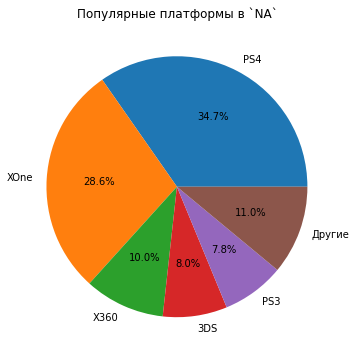

In [35]:
new_data_n = new_data[['platform', 'na_sales']]
new_data_n = (new_data_n.groupby('platform')
                        .sum()
                        .sort_values(by='na_sales',ascending=False)
                        .reset_index(drop=False))

top_plat_n = new_data_n.loc[:4, 'platform']
top_sal_n = new_data_n.loc[:4, 'na_sales']

new_data_na = pd.DataFrame({'platform':top_plat_n, 'na_sales':top_sal_n})
ntop_sal_n = round(sum(new_data_n.loc[5:, 'na_sales']), 2)
new_data_na.loc[len(new_data_na)] = ['Другие', ntop_sal_n]
#new_data_na
new_data_na.plot(kind='pie',
                 y='na_sales',
                 labels=new_data_na['platform'],
                 legend=False,
                 autopct=('%1.1f%%'),
                 figsize=(6,6))
plt.ylabel('')
plt.title('Популярные платформы в `NA`');

**Топ 5 популярных платформ в `NA` в процентном соотношений:**
- PS4 - 34.7%
- XOne - 28.6%
- X360 - 10.0%
- 3DS - 8.0%
- PS3 - 7.8%
- Все остальные платформы - 11.0%

**В Северное Америке игроки больше предпочитают `PS4`, затем `XOne`, скорее всего из-за того, что это самые популярные платформы.**

**Теперь взглянем на популярные платформы в `EU`.**

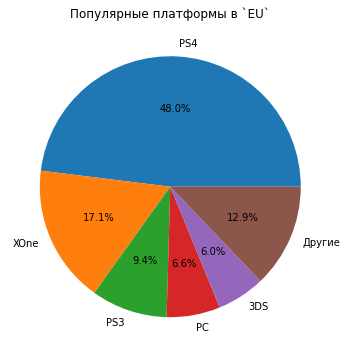

In [36]:
new_data_e = new_data[['platform', 'eu_sales']]
new_data_e = (new_data_e.groupby('platform')
                        .sum()
                        .sort_values(by='eu_sales',ascending=False)
                        .reset_index(drop=False))

top_plat_e = new_data_e.loc[:4, 'platform']
top_sal_e = new_data_e.loc[:4, 'eu_sales']

new_data_ea = pd.DataFrame({'platform':top_plat_e, 'eu_sales':top_sal_e})
ntop_sal_e = round(sum(new_data_e.loc[5:, 'eu_sales']), 2)
new_data_ea.loc[len(new_data_ea)] = ['Другие', ntop_sal_e]
#new_data_ea
new_data_ea.plot(kind='pie',
                 y='eu_sales',
                 labels=new_data_ea['platform'],
                 legend=False,
                 autopct=('%1.1f%%'),
                 figsize=(6,6))
plt.ylabel('')
plt.title('Популярные платформы в `EU`');

**Топ 5 популярных платформ в `EU` в процентном соотношений:**
- PS4 - 48.0%
- XOne - 17.1%
- PS3 - 9.4%
- PC - 6.6%
- 3DS - 6.0%
- Все остальные платформы - 12.9%

**В Европе огромную популярность имеет `PS4`(затем `XOne`), предпочтения похожи с Северной Америкой, думаю, причины такой популярности этих платформ те же.**

**Настало время взглянуть на популярные платформы в `JP`.**

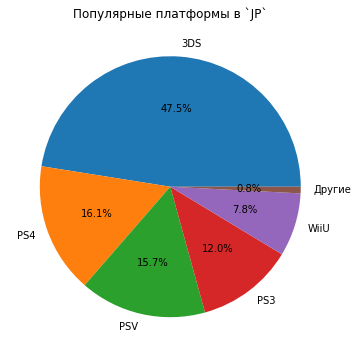

In [37]:
new_data_j = new_data[['platform', 'jp_sales']]
new_data_j = (new_data_j.groupby('platform')
                        .sum()
                        .sort_values(by='jp_sales',ascending=False)
                        .reset_index(drop=False))

top_plat_j = new_data_j.loc[:4, 'platform']
top_sal_j = new_data_j.loc[:4, 'jp_sales']

new_data_ja = pd.DataFrame({'platform':top_plat_j, 'jp_sales':top_sal_j})
ntop_sal_j = round(sum(new_data_j.loc[5:, 'jp_sales']), 2)
new_data_ja.loc[len(new_data_ja)] = ['Другие', ntop_sal_j]
#new_data_ja
new_data_ja.plot(kind='pie',
                 y='jp_sales',
                 labels=new_data_ja['platform'],
                 legend=False,
                 autopct=('%1.1f%%'),
                 figsize=(6,6))
plt.ylabel('')
plt.title('Популярные платформы в `JP`');

**Топ 5 популярных платформ в `EU` в процентном соотношений:**
- 3DS - 47.5%
- PS4 - 16.1%
- PSC - 15.7%
- PS3 - 12.0%
- WiiU - 7.8%
- Все остальные платформы - 0.8%

**`3DS` имеет большую популярность в Японии, по сравнению с другими регионами, только после неё идёт `PS4`, который был так популярен в других регионах.**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Первичное представление о регионах получено.

**Предпочтения платформ во всех регионах пересикается, более того, топ 5 рынка занимает около 90%(в Японии все 99%!) рынка почти во всех регионах. Выделим самые популярные платформы в каждом регионе:**
- NA - PS4
- EU - PS4
- JP - 3DS

### Популярные жанры

**Выявим самые популярные жанры в каждом регионе (топ 5). Выведем круговую диаграмму для каждой.**

**Начнём как обычно с `NA`.**

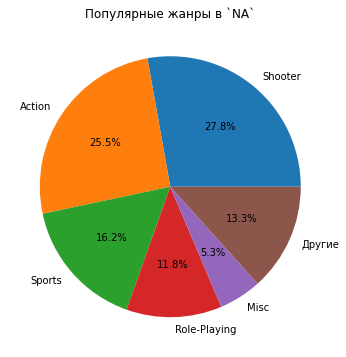

In [38]:
new_data_n = new_data[['genre', 'na_sales']]
new_data_n = (new_data_n.groupby('genre')
                        .sum()
                        .sort_values(by='na_sales',ascending=False)
                        .reset_index(drop=False))

top_plat_n = new_data_n.loc[:4, 'genre']
top_sal_n = new_data_n.loc[:4, 'na_sales']

new_data_na = pd.DataFrame({'genre':top_plat_n, 'na_sales':top_sal_n})
ntop_sal_n = round(sum(new_data_n.loc[5:, 'na_sales']), 2)
new_data_na.loc[len(new_data_na)] = ['Другие', ntop_sal_n]
#new_data_na
new_data_na.plot(kind='pie',
                 y='na_sales',
                 labels=new_data_na['genre'],
                 legend=False,
                 autopct=('%1.1f%%'),
                 figsize=(6,6))
plt.ylabel('')
plt.title('Популярные жанры в `NA`');

**Топ 5 популярных жанров в `NA`:**
- Shooter - 27.8%
- Action - 25.5%
- Sports - 16.2%
- Role-Playing - 7.9%
- Misc - 5.3%
- Все другие жанры - 13.3%

**В Северной Америке больше всего предпочитают шутеры, затем экшен и спорт.**

**Взглянем на `EU`.**

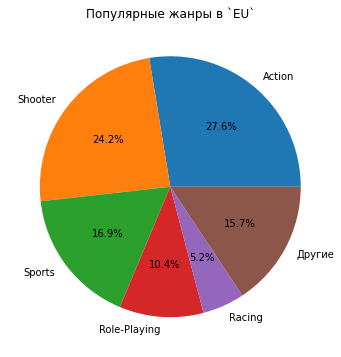

In [59]:
new_data_e = new_data[['genre', 'eu_sales']]
new_data_e = (new_data_e.groupby('genre')
                        .sum()
                        .sort_values(by='eu_sales',ascending=False)
                        .reset_index(drop=False))

top_plat_e = new_data_e.loc[:4, 'genre']
top_sal_e = new_data_e.loc[:4, 'eu_sales']

new_data_ea = pd.DataFrame({'genre':top_plat_e, 'eu_sales':top_sal_e})
ntop_sal_e = round(sum(new_data_e.loc[5:, 'eu_sales']), 2)
new_data_ea.loc[len(new_data_ea)] = ['Другие', ntop_sal_e]
#new_data_ea
new_data_ea.plot(kind='pie',
                 y='eu_sales',
                 labels=new_data_ea['genre'],
                 legend=False,
                 autopct=('%1.1f%%'),
                 figsize=(6,6))
plt.ylabel('')
plt.title('Популярные жанры в `EU`');

**Топ 5 популярных жанров в `NA`:**
- Action - 27.6%
- Shooter - 24.2%
- Sports - 16.9%
- Role-Playing - 10.4%
- Racing - 5.2%
- Все другие жанры - 15.7%

**В Европе, так же как и в Северной Америке больше всего предпочитают экшен и шутеры, затем затем спорт, даже проценты почти совпадают.**

**Теперь посмотрим на `JP`.**

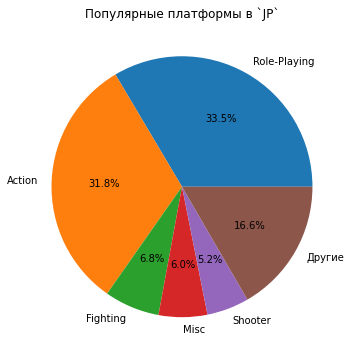

In [40]:
new_data_j = new_data[['genre', 'jp_sales']]
new_data_j = (new_data_j.groupby('genre')
                        .sum()
                        .sort_values(by='jp_sales',ascending=False)
                        .reset_index(drop=False))

top_plat_j = new_data_j.loc[:4, 'genre']
top_sal_j = new_data_j.loc[:4, 'jp_sales']

new_data_ja = pd.DataFrame({'genre':top_plat_j, 'jp_sales':top_sal_j})
ntop_sal_j = round(sum(new_data_j.loc[5:, 'jp_sales']), 2)
new_data_ja.loc[len(new_data_ja)] = ['Другие', ntop_sal_j]
#new_data_ja
new_data_ja.plot(kind='pie',
                 y='jp_sales',
                 labels=new_data_ja['genre'],
                 legend=False,
                 autopct=('%1.1f%%'),
                 figsize=(6,6))
plt.ylabel('')
plt.title('Популярные платформы в `JP`');

**Топ 5 жанров с `JP`:**
- Role-Playing - 33.5%
- Action - 31.8%
- Fighting - 6.8%
- Misc - 6.0%
- Shooter - 5.2%
- Все остальные жанры - 16.6%

**В Японии ситуация отличается от других, тут больше всего играют в ролевые и экшен игры(оба более 30%!).**


**Предполагаю, такая разница связана с менталитетом регионов, японцы больше предпочитают окунуться в виртуальную жизнь, нежели европейцы или северо-американцы(они больше любят активные игры). Топ жанров в каждом регионе:**
- NA и EU - Action и Shooter
- JP - Role-Playing и Action

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

А тут хорошо видно, что Япония наиболее уникальна среди регионов

### Влияние ESRB

**ESRB(Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».**

**Посмотрим, есть ли влияние ESRB на продажи в регионах.**

**Посмотрим все значения, которые принимает столбец `rating`.**

In [41]:
new_data['rating'].unique()

array(['M', 'T', 'E', 'E10+'], dtype=object)

- E -  Для всех
- M - Для взрослых
- T - Подросткам
- E10+ - Для всех от 10 лет и старше
- AO - Только для взрослых
- EC - Для детей младшего возраста
- RP - Рейтинг ожидается

**Построим для каждого региона диаграмму.**

**Начнём с региона `NA`.**

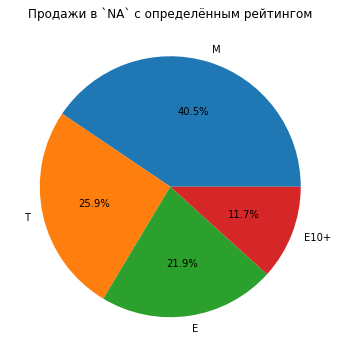

In [42]:
new_data_n = new_data[['rating', 'na_sales']]
new_data_n = (new_data_n.groupby('rating')
                        .sum()
                        .sort_values(by='na_sales',ascending=False)
                        .reset_index(drop=False))
#new_data_n
new_data_n.plot(kind='pie',
                 y='na_sales',
                 labels=new_data_n['rating'],
                 legend=False,
                 autopct=('%1.1f%%'),
                 figsize=(6,6))
plt.ylabel('')
plt.title('Продажи в `NA` с определённым рейтингом');

**Самые продаваемые игры имеют рейтин `M`, затем `T`, `E` и `E10+`, остальные категории можно даже не рассматривать, их критичесик мало. Можно сделать вывод, что большинство игр создано для всех, затем для взрослых и подростков.**

**Далее посмотрим в регионе `EU`.**

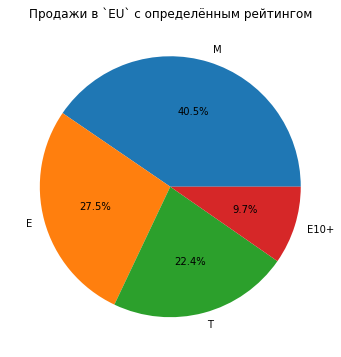

In [43]:
new_data_e = new_data[['rating', 'eu_sales']]
new_data_e = (new_data_e.groupby('rating')
                        .sum()
                        .sort_values(by='eu_sales',ascending=False)
                        .reset_index(drop=False))
#new_data_e
new_data_e.plot(kind='pie',
                 y='eu_sales',
                 labels=new_data_e['rating'],
                 legend=False,
                 autopct=('%1.1f%%'),
                 figsize=(6,6))
plt.ylabel('')
plt.title('Продажи в `EU` с определённым рейтингом');

**История в Европе почти аналогична с Северной Америкой, единственное, `E` и `T` поменялись местами.**

**Посмотрим на регион `JP`.**

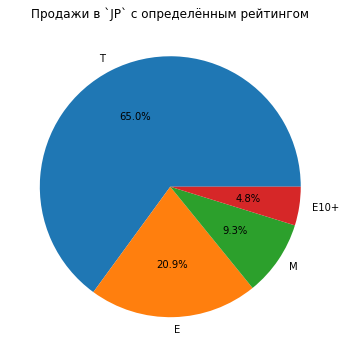

In [44]:
new_data_j = new_data[['rating', 'jp_sales']]
new_data_j = (new_data_j.groupby('rating')
                        .sum()
                        .sort_values(by='jp_sales',ascending=False)
                        .reset_index(drop=False))
#new_data_j
new_data_j.plot(kind='pie',
                 y='jp_sales',
                 labels=new_data_j['rating'],
                 legend=False,
                 autopct=('%1.1f%%'),
                 figsize=(6,6))
plt.ylabel('')
plt.title('Продажи в `JP` с определённым рейтингом');

**Япония не перестаёт удивлять, игры для подростоков(`T`) лидируют, забирая 65% рынка себе и лишь 20% относится к `E`.**

**Мы выяснили, что рейтинг ESRB влияет на продажи:**
- В `NA` и `EU` предпочитают групп `E`, `T` и `M`
- В `JP` чаще всего покупают игры групп `T`, затем `E`

**Опишем портрет типичного игрока каждого региона.**
- `NA`(северо-американец) - чаще всего играет на платформах `PS4` `XOne`, любимые жанры - шутер и экшен, которые чаще всего относятся к группе `M`(для взрослых), затем `T`(подросткам) и `E`(для всех)
- `EU`(европеец) - зеркало северо-американца, единственное отличие - чаще всего играет на платформах `PS4`
- `JP`(японец) - любит играть на платформе `3DS`, любимый жанр Role-Playing и экшен, в 65% случаях его игры относятся к группам `T`(для подростков)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Рассмотрев все регионы мы пришли к выводу, что у каждого региона есть своя специфика и это точно стоит учитывать и дальше 

## Гипотезы

### XOne и PC

**Узнаем, равны ли средние пользовательские рейтинги двух платформ - `XOne` и `PC`. H₀ - Средние пользовательские рейтинги двух платформ равны. H₁ - средние пользовательские рейтинги двух платформ не равны. Alpha будет равен 0.05.**

In [45]:
new_data_x = new_data.query('platform == "XOne"')
new_data_p = new_data.query('platform == "PC"')

alpha = 0.05

results = st.ttest_ind(new_data_x['user_score'], new_data_p['user_score'], equal_var=False)

print('Р-значение:', results.pvalue)

if alpha < results.pvalue:
    print('Не отвергаем нулевую гипотезу!')
else:
    print('Отвергаем нулевую гипотезу!')
#new_data['platform'].unique()

Р-значение: 0.05074473945849195
Не отвергаем нулевую гипотезу!


**Проведя двухвыборочный Т-тест для двух независимых выборок(указав, что дисперсии разные), мы поняли, что пользовательские рейтинги платформ `XOne` и `PC` примерно равны.**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Гипотезы сформулированы и верно определен метод проверки. С выводами согласен. 

### Action и Sports

**Узнаем, равны ли средние пользовательские рейтинги жанров `Action` и `Sports`. H₀ - Средние пользовательские рейтинги двух жанров равны. H₁ - средние пользовательские рейтинги двух жанров не равны. Alpha будет равен 0.05.**

In [46]:
new_data_ac = new_data.query('genre == "Action"')
new_data_sp = new_data.query('genre == "Sports"')

alpha = 0.05

results = st.ttest_ind(new_data_ac['user_score'], new_data_sp['user_score'], equal_var=False)

print('Р-значение:', results.pvalue)

if alpha < results.pvalue:
    print('Не отвергаем нулевую гипотезу!')
else:
    print('Отвергаем нулевую гипотезу!')

Р-значение: 7.412639945317511e-17
Отвергаем нулевую гипотезу!


**Проведя Т-тест для двух независимых выборок(указав, что дисперсии не равны), мы выяснили, что средние пользовательские рейтинги жанров `Action` и `Sports` не равны.**

**Нулевую и альтернативную гипотезу сформулировали очень просто: H₀ - средние равны, H₁ - средние не равны. При проверки гипотез мы использовали Т-тест для двух незавсимых выборов, указав, что их дисперсии не равны, для более точного теста. Alpha определили самостоятельно - 0.05, так как посчитали, что это оптимальный вариант.**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Аналогично

## Вывод

**Давайте подведём итоги и ответим на интересующий вопрос - какая игра в 2017 году вероятнее всего станет популярной?**

**На этапе подготовки данных мы исправили названия столбцов, заполнили пропуски и удалили дубликаты(дубликатов было очень мало), после чего создали новый столбец с общей прибылью во всех регионах.**

**Во время исследовательского анализа мы узнали:**
- Актуальный период - 2014 - 2016 года
- Лидер продаж по платформам - `PS4`
- Большинство глобальных продаж далеки от среднего
- Корреляция между рейтингами и продажами слабая, но всё же оценки критиков немного виляют на продажи
- Самые популярные жанры - `Action` и `Shooter`

**Создали портрет игрока для каждого региона:**
- NA(северо-американец) - чаще всего играет на платформах PS4 и XOne, любимые жанры - экшен и шутер, которые чаще всего относятся к группе M(для взрослых), затем T(подросткам) и E(для всех)
- EU(европеец) - зеркало северо-американца, единственное отличие - чаще всего играет на платформах PS4
- JP(японец) - любит играть на платформе 3DS, любимый жанр Role-Playing, в 65% случаях его игры относятся к группам T(для подростков)

**Так же выяснили, что ESRB влияет на продажи:**
- NA и EU предпочитают групп M, T и E
- В JP чаще всего покупают игры групп T

**Проверили гипотезы:**
- Средние пользовательские рейтинги платформ `XOne` и `PC` примерно равны
- Средние пользовательские рейтинги жанров `Action` и `Sports` не равны

**Мои предположения на 2017 год: Если игра будет выпускаться для `NA` и `EU`, то стоит выпустить её на платформах PS4, XOne и PC, жанры желательно должны быть либо Shooter, либо Actions, и если ESRB выдаст оценку "Для взрослых", то с огромной вероятностью она будет в топе продаж. Если же игра будет направлена в регион `JP`, то её стоит сделать на платформах 3DS и снова на PC(так как эта платформа всё набирает и набирает обороты), жанр желательно должен быть похож на Role-Playing, а оценка ESRB - "Для подростков".**

**Надеюсь, данный проект поможет создать правильную ставку на заведомо популярный продукт или же создать игру, которая соберёт большие продажи.**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Спасибо тебе за такой подробный итоговый вывод. С таким выводом мы сможем составить представление о рынке продаж видеоигр и суметь спрогнозировать продажи. 

<div class="alert alert-block alert-info">
 
### Итоговый Комментарий ревьюера
    
#### Успех
    
Благодарю тебя за выполнение работы. Мне понравился твой проект за структурность и последовательность. Во многих местах ты подбираешь оптимальный код и автоматизируешь свою работу, а это очень пригодится в будущем. Выделить бы хотел Предобработку данных. На мой взгляд она получилась особенно удачно. Очень насыщенный итоговый вывод вышел. Старайся такие выводы делать и в будущем. 
    
    
Однако, в проекте есть несколько замечаний, которые надо исправить:

* Актуальный период пересмотреть.
* Ящик с усами доработать. 
* Построить график зависимости хотя бы еще для одной из платформ.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
    
    Всё исправил, где-то даже улучшил код, Выв
</div>

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2 
    
#### Успех

Спасибо тебе за доработку проекта. Вот теперь я его готов принять. От себя я хочу пожелать успехов в дальнешей учебе. Ты точно справишься и дальше, я уверен в этом. 